In [1]:
import numpy as np
import pandas as pd
import os, sys
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
folder = "/domus/h1/malinlu/elflab/Projects/LacIdynamicsInVivo/EXP-23-CA4324/"

In [24]:
def normalizeTimesAddStrain( OSym="even", run=2):
    df_even = pd.read_excel(folder+'dots_run{}_even.xlsx'.format(run), engine='openpyxl')
    df_odd = pd.read_excel(folder+'dots_run{}_odd.xlsx'.format(run), engine='openpyxl')
    print(len(df_even), len(df_odd))
    time1 = np.round(df_odd.iloc[0]["time"]/1000)
    #print(time1, np.round(df_odd["time"]/1000))
    norm_time_odd = np.round(df_odd["time"]/1000)-time1 
    norm_time_even = np.round(df_even["time"]/1000)-time1
    df_odd["Time (s)"] = norm_time_odd
    df_even["Time (s)"]  = norm_time_even
    if OSym=="even":
        df_even["Strain"] = ["OSymL" for x in range(len(df_even))]
        df_odd["Strain"] = ["term" for x in range(len(df_odd))]
    else:
        df_even["Strain"] = ["term" for x in range(len(df_even))]
        df_odd["Strain"] = ["OSymL"  for x in range(len(df_odd))]
    
    df = pd.concat([df_odd, df_even])
    df["Run"] = [run for x in range(len(df_odd)+len(df_even))]
    
    return(df)

In [4]:
trun = normalizeTimesAddStrain(OSym="o")


11313 16343


In [5]:
trun

,coord_1,coord_2,internalCoord_1,internalCoord_2,err_1,err_2,err_3,ampl,bg,id,dr,sigma,time,numCells,Position,Time (s),Strain,Run
0,699.102225,148.598191,0.107029,0.651466,0.018361,0.020230,0.000957,6134.716158,117.793220,300,1.205242,3.416566,1691664750190,580,1,0.0,OSymL,2
1,457.979365,156.661746,0.771438,-0.296809,0.026263,0.027252,0.004933,12189.163390,103.456373,140,1.306325,4.517638,1691664750190,580,1,0.0,OSymL,2
2,673.743773,151.488185,0.839489,0.403776,0.040127,0.033407,-0.002996,7572.416589,115.717084,287,1.801631,4.129263,1691664750190,580,1,0.0,OSymL,2
3,1025.898803,173.741860,0.644020,-0.159720,0.017123,0.015662,0.000646,4569.542718,139.273450,546,0.443265,2.860423,1691664750190,580,1,0.0,OSymL,2
4,442.279313,179.200297,0.112782,-0.587208,0.017275,0.017803,0.001719,4952.390764,125.076295,125,0.294201,3.079904,1691664750190,580,1,0.0,OSymL,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11308,921.264228,1482.547291,0.275242,0.232113,0.039793,0.031444,-0.002438,3848.365272,119.975660,679,1.235517,3.221594,1691665039753,626,20,290.0,term,2
11309,936.528870,1491.359300,0.524173,-0.885276,0.033014,0.050751,0.011134,1772.072245,114.163579,690,0.733293,2.227375,1691665039753,626,20,290.0,term,2
11310,984.891131,1486.142785,0.302814,-0.488525,0.043843,0.041437,-0.004814,1932.867273,119.804287,737,0.699699,2.502165,1691665039753,626,20,290.0,term,2
11311,1005.071132,1484.431361,0.648456,-0.201573,0.016873,0.018083,-0.001411,10139.835897,108.548163,753,0.869001,4.081237,1691665039753,626,20,290.0,term,2


In [19]:
def AvgNumDotsCells(df): 
    run=df
    avgNumDotsCells_term = np.array(run[run["Strain"]=="term"].groupby("Position").count()["numCells"])/ \
    np.array(run[run["Strain"]=="term"].groupby("Position").mean(numeric_only=True)["numCells"])
    avgNumDotsCells_OSym = np.array(run[run["Strain"]=="OSymL"].groupby("Position").count()["numCells"])/ \
    np.array(run[run["Strain"]=="OSymL"].groupby("Position").mean(numeric_only=True)["numCells"])
    time_term = np.array(run[run["Strain"]=="term"].groupby("Position").first()["Time (s)"])
    time_OSym = np.array(run[run["Strain"]=="OSymL"].groupby("Position").first()["Time (s)"])
    strain_term = np.array(run[run["Strain"]=="term"].groupby("Position").first()["Strain"])
    strain_OSym = np.array(run[run["Strain"]=="OSymL"].groupby("Position").first()["Strain"])
    runs = np.array(run.groupby(["Position", "Strain"]).first()["Run"])
    avgNumDotsCells = pd.DataFrame({"Run":runs, "Strain":np.concatenate([strain_term, strain_OSym]), "Avg. Num. (Dots)": \
             np.concatenate([avgNumDotsCells_term, avgNumDotsCells_OSym]), "Time (s)": \
              np.concatenate([time_term, time_OSym])})
    return(avgNumDotsCells)

In [20]:
trun_Num = AvgNumDotsCells(trun)

In [21]:
def allRuns(ids_runs, locs_OSym):
    df1 = normalizeTimesAddStrain( OSym=locs_OSym[0], run=ids_runs[0])
    runNum1 = AvgNumDotsCells(df1)
    for i,m in zip(ids_runs[1:], locs_OSym[1:]):
        df = normalizeTimesAddStrain( OSym=m, run=i)
        runNum = AvgNumDotsCells(df)
        runNum1 = pd.concat([runNum1,runNum])
    return(runNum1)

In [22]:
allR = allRuns([2,3,4,5],["odd","odd", "even", "even"])

11313 16343
10660 15115
10218 10287
11670 8875


<AxesSubplot:xlabel='Time (s)', ylabel='Avg. Num. (Dots)'>

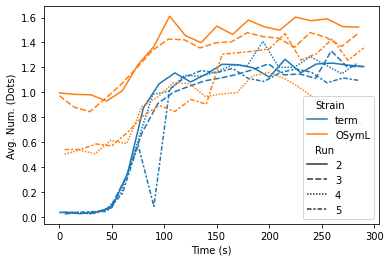

In [23]:
sns.lineplot(data=allR, x = "Time (s)", y = "Avg. Num. (Dots)", hue = "Strain", style = "Run")

In [ ]:
def normalizeTimesAddStrain( OSym="even", run=2):
    df_even = pd.read_excel(folder+'dots_run10_{}_even.xlsx'.format(run), engine='openpyxl')
    df_odd = pd.read_excel(folder+'dots_run10_{}_odd.xlsx'.format(run), engine='openpyxl')
    print(len(df_even), len(df_odd))
    time1 = np.round(df_odd.iloc[0]["time"]/1000)
    #print(time1, np.round(df_odd["time"]/1000))
    norm_time_odd = np.round(df_odd["time"]/1000)-time1 
    norm_time_even = np.round(df_even["time"]/1000)-time1
    df_odd["Time (s)"] = norm_time_odd
    df_even["Time (s)"]  = norm_time_even
    if OSym=="even":
        df_even["Strain"] = ["OSymL" for x in range(len(df_even))]
        df_odd["Strain"] = ["term" for x in range(len(df_odd))]
    else:
        df_even["Strain"] = ["term" for x in range(len(df_even))]
        df_odd["Strain"] = ["OSymL"  for x in range(len(df_odd))]
    
    df = pd.concat([df_odd, df_even])
    df["Run"] = [run for x in range(len(df_odd)+len(df_even))]
    
    return(df)

In [25]:
allR = allRuns([1,2,3,4],["odd","odd", "even", "even"])

8431 13871
8060 13211
14429 8536
13385 7794


<AxesSubplot:xlabel='Time (s)', ylabel='Avg. Num. (Dots)'>

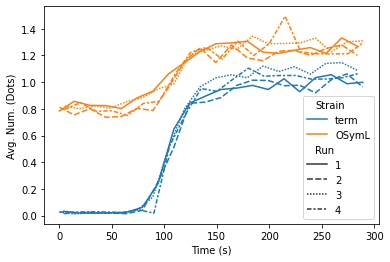

In [26]:
sns.lineplot(data=allR, x = "Time (s)", y = "Avg. Num. (Dots)", hue = "Strain", style = "Run")